## 송재환 클로젯셰어 분석 요약 👕👚
- 클로젯셰어 신규 구매 전반 분석 및 결과 도식화
- 분석 자료: 최근 3개월간 신규 구매 데이터 일부

- Import 모듈 및 PC 세팅

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("white")
sns.set()

# (Windows OS) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'MalgunGothic'  
# (MAC OS)
plt.rcParams['font.family'] = 'AppleGothic'  
# 문자 - (마이너스) 정상 출력을 위한 코드
plt.rcParams['axes.unicode_minus'] = False
# 경고 제거
plt.rcParams.update({'figure.max_open_warning': 0})
# 노트북 세팅
pd.options.display.float_format = '{:.2f}'.format

- 데이터 파일 Read

In [3]:
closet_df=pd.read_excel('/Users/jaehwan/Desktop/송재환/DS_Project/기술과제 제출/클로젯셰어_과제DB 대체 자료.xlsx', encoding='cp949')

# 컬럼명 소문자로 변경
closet_df.columns = closet_df.columns.str.lower()

# 날짜 관련 컬럼 데이터 유형 모두 날짜형으로 변경
closet_df.reg_date = pd.to_datetime(closet_df.reg_date)
closet_df.order_date = pd.to_datetime(closet_df.order_date)

## EDA

### 데이터 정보 확인
- 데이터는 모두 범주형 변수로 구성되어 있다.
- reg_date는 2017년 6월부터 2021년 3월 31일까지의 값으로 구성되어 있다.
- order_date는 2021년 1월 1일부터 2021년 3월 31일까지 값으로 구성되어 있다.
- 가장 많이 이용된 브랜드는 구찌이다. (총 232건)
- 가장 많이 이용된 카테고리는 '가방(BA)'이다.
- 가장 많이 이용된 제품은 'chevron quilted cross bag black'이다. (총 23건)
- 가장 많이 이용한 신규 사용자는 'a1149461'이다. (총 11건)
- 가장 많이 이용된 주문 상품 종류는 '4days'다. (총 894건)
- 앱으로 서비스를 이용한 건수는 1295건이다.
-----
- order_date를 기준으로 보았을 때, brandnm, reg_date, app_yn에 결측치가 있는 것으로 보인다.

In [4]:
# closet_df 정보
closet_df.info()
closet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


### 결측치 확인 및 처리
- app_yn의 경우 binary case이기 때문에, 결측치를 'N'으로 대체
- reg_date의 경우 user의 id가 순서대로 부여되었다고 판단되기 때문에<br>직전의 user의 id에 부여된 reg_date로 대체한다.

In [5]:
# 카테고리가 '투피스(TP)'의 경우, 브랜드 결측치가 존재함.
# 브랜드는 특정하기 어렵기 때문에 null값 유지
closet_df[closet_df['brandnm'].isnull() == True]['sub_type'].unique()

array(['TP'], dtype=object)

In [6]:
# app_yn이 Y가 아닌 경우, 결측치가 존재함.
# 결측치를 'N'으로 처리
# closet_df[closet_df['app_yn'].isnull() == True].head(5)
closet_df['app_yn'] = closet_df['app_yn'].fillna('N')
closet_df['app_yn'].head(5)

0    Y
1    N
2    N
3    N
4    Y
Name: app_yn, dtype: object

In [7]:
# reg_date 결측치
closet_df[closet_df['reg_date'].isnull() == True]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,N
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,N
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


In [8]:
# reg_date 순서대로 user의 id가 부여되었는지 확인
reg_user = closet_df[closet_df['reg_date'].notnull()].sort_values('user').sort_values('reg_date').reset_index().iloc[:,3:5]
print(reg_user)

for i in np.arange(0,len(reg_user)-1):
    if int(reg_user.user[i][1:]) > int(reg_user.user[i+1][1:]):
        
        if reg_user.reg_date[i] != reg_user.reg_date[i+1]:
            print("순서대로 부여되지 않았습니다.")

print("")
print("user의 id는 reg_date의 순서대로 부여되었다.")

          user   reg_date
0       a11612 2017-06-24
1       a11803 2017-07-02
2       a13637 2018-03-09
3       a13741 2018-03-20
4       a13934 2018-03-27
...        ...        ...
1461  a1151479 2021-03-31
1462  a1151481 2021-03-31
1463  a1151496 2021-03-31
1464  a1151499 2021-03-31
1465  a1151564 2021-03-31

[1466 rows x 2 columns]

user의 id는 reg_date의 순서대로 부여되었다.


In [9]:
# reg_date의 경우, 바로 앞의 날짜를 임의 부여
closet_df['reg_date'] = closet_df['reg_date'].fillna(method = 'pad')

In [10]:
# 결측치 처리 후 df 정보
closet_df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1471,1471,1471,1471,1471
unique,245,979,1234,368,90,2,6,2
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


### user(신규 사용자) 데이터 특징 및 분포
- 신규 사용자 별 주문 일자는 1:1 대응 관계이기 때문에 재구매 여부 등의 정보를 파악할 순 없다.
- 다만, 주문 일자에 여러가지 브랜드와 제품을 이용할 수 있다.
- 주문시 2회 이상 이용한 고객은 전체의 약 10% 정도이다.

|이용횟수|1|2|3|4|5|6|7|9|10|11|
|--|--|--|--|--|--|--|--|--|--|--|
|count|1095|89|33|8|1|3|2|1|1|1|

In [11]:
# user가 order_date에 1:1 대응되는 모습
print("고유 user 수: ", len(closet_df['user'].unique()))
user_count = closet_df.groupby('user')['order_date'].value_counts().sort_values(ascending=False)
user_count

고유 user 수:  1234


user      order_date
a1149461  2021-03-17    11
a1149583  2021-03-19    10
a1142677  2021-01-18     9
a1143701  2021-01-22     7
a189404   2021-03-24     7
                        ..
a1148750  2021-03-09     1
a1148768  2021-03-12     1
a1148769  2021-03-17     1
a1148775  2021-03-12     1
a1146892  2021-02-26     1
Name: order_date, Length: 1234, dtype: int64

In [12]:
# order_date에 여러 제품을 이용할 수는 있다.
# 가장 이용횟수가 많은 'a1149461' user 기준
closet_df[closet_df['user'] == 'a1149461']

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
1148,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N
1149,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N
1150,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N
1151,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N
1152,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N
1153,roajeu,ruffle basic pattern mermaid trumpet-skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N
1154,Alexander Wang,basic pattern skirt grey,a1149461,2021-03-15,2021-03-17,4days,B,N
1155,Christian Dior,basic pattern sweater burgundy,a1149461,2021-03-15,2021-03-17,4days,T,N
1156,MSGM,basic pattern top black,a1149461,2021-03-15,2021-03-17,4days,T,N
1157,Fayewoo,ruffle lace pattern mermaid trumpet-skirt red,a1149461,2021-03-15,2021-03-17,4days,B,N


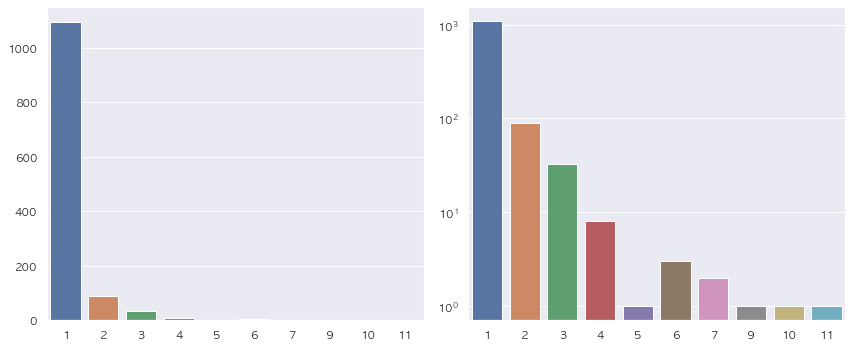

In [13]:
user_count = pd.DataFrame(user_count)
user_count.rename(columns={'order_date':'total_count'}, inplace = True)
user_count.reset_index('order_date', inplace = True)
user_count.reset_index('user', inplace = True)

# 1회 이용자수가 90%의 비중이기 때문에 y축에 log를 적용해 전체적인 분포 확인
figure, ax_list_list = plt.subplots(nrows=1, ncols=2);
figure.set_size_inches(12,5)
ax_list = ax_list_list.reshape(2)

sns.barplot(user_count['total_count'].value_counts().index, user_count['total_count'].value_counts().values, ax=ax_list[0])
sns.barplot(user_count['total_count'].value_counts().index, user_count['total_count'].value_counts().values, log = True, ax=ax_list[1])

plt.tight_layout()

In [14]:
# user별 총 이용횟수는 closet_df에 'total_count'로 추가하여 추후 user 구분의 기준으로 활용
closet_df = pd.merge(closet_df, user_count, on = 'user', how = 'left')
closet_df.iloc[:5,2::7]

,user,total_count
0,a161237,1
1,a1140859,3
2,a1140859,3
3,a1140859,3
4,a1140740,1


### 브랜드 데이터 특징 및 분포
- 주어진 데이터 기준 클로젯셰어가 공유하는 브랜드는 245개이다.
- 최대 이용건수 232건과 상위 75% 이용건수 3회를 비교하면, 이용 선호도가 몰려있는 브랜드가 있음을 확인할 수 있다.
- 구찌(232건), 샤넬(90건), 생로랑(86건), 루이비통(79건), 프라다(58건)으로 명품 이용 비중이 높음을 확인할 수 있다.
- 다만, 이용횟수가 5회 이상인 user들은 위 브랜드에 이용이 집중되지 않고, 다양한 브랜드 이용하는 것을 확인할 수 있다.

In [15]:
closet_df.groupby('brandnm')['user'].count().sort_values(ascending=False).describe()

count   245.00
mean      5.89
std      18.48
min       1.00
25%       1.00
50%       1.00
75%       3.00
max     232.00
Name: user, dtype: float64

In [16]:
closet_df.groupby('brandnm')['user'].count().sort_values(ascending=False).head(5)

brandnm
Gucci            232
Chanel            90
Saint Laurent     86
Louis Vuitton     79
Prada             58
Name: user, dtype: int64

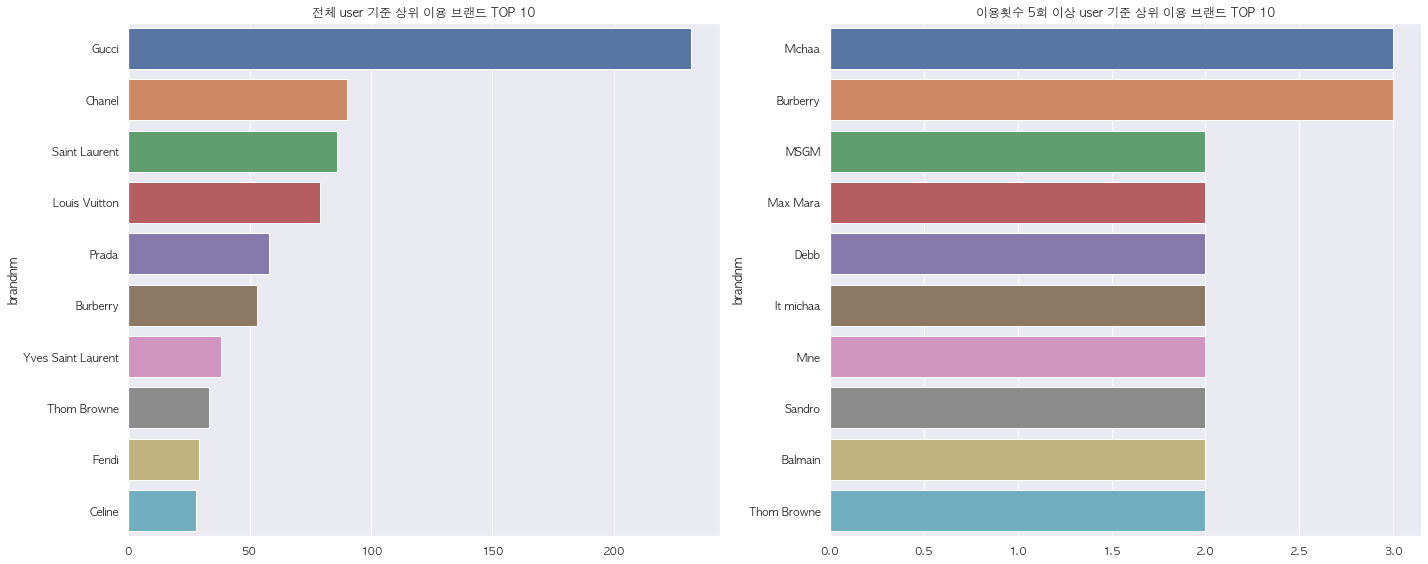

In [17]:
figure, ax_list_list = plt.subplots(nrows=1, ncols=2);
figure.set_size_inches(20,8)
ax_list = ax_list_list.reshape(2)

sns.barplot(closet_df.groupby('brandnm')['user'].count().sort_values(ascending=False).head(10).values,
            closet_df.groupby('brandnm')['user'].count().sort_values(ascending=False).head(10).index, ax=ax_list[0])
ax_list[0].set_title("전체 user 기준 상위 이용 브랜드 TOP 10")

sns.barplot(closet_df.query('total_count >= 5').groupby('brandnm')['user'].count().sort_values(ascending=False).head(10).values,
            closet_df.query('total_count >= 5').groupby('brandnm')['user'].count().sort_values(ascending=False).head(10).index, ax=ax_list[1])
ax_list[1].set_title("이용횟수 5회 이상 user 기준 상위 이용 브랜드 TOP 10")

plt.tight_layout()

### 제품 카테고리(sub_type) 데이터 특징 및 분포
- 전체 이용횟수 가방(BA) 카테고리 이용이 가장 높음을 확인할 수 있다. (전체 중 47%)
- 외투(O), 드레스(D), 상의(T)의 이용은 비슷한 정도를 보이고 있음을 확인할 수 있다.
- 하의(B)와 투피스(TP)는 이용이 가장 저조한 카테고리이다.
-----
- 이용횟수가 많은 고객들은 의류 카테고리를 다양하게 이용하고 있고, 가방의 이용횟수는 오히려 낮음을 확인할 수 있다.

In [18]:
closet_df.groupby('sub_type')['user'].count().sort_values(ascending=False)

sub_type
BA    692
O     267
D     261
T     164
B      58
TP     29
Name: user, dtype: int64

In [19]:
closet_df.groupby('sub_type')['user'].count().sort_values(ascending=False)/len(closet_df['sub_type'])

sub_type
BA   0.47
O    0.18
D    0.18
T    0.11
B    0.04
TP   0.02
Name: user, dtype: float64

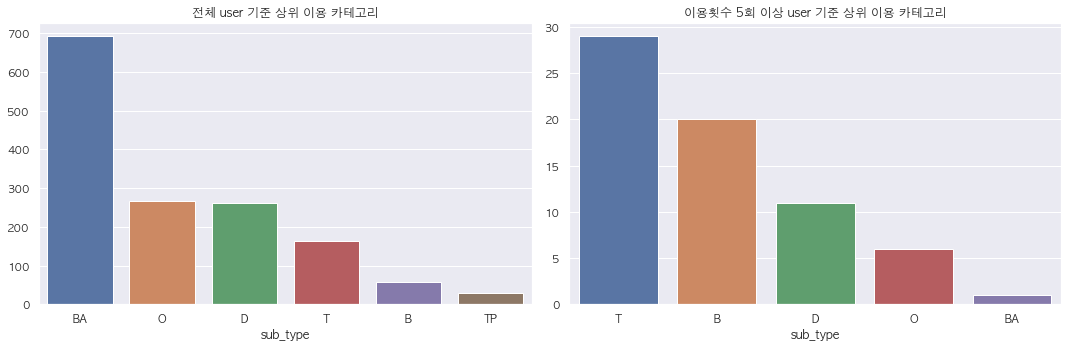

In [20]:
figure, ax_list_list = plt.subplots(nrows=1, ncols=2);
figure.set_size_inches(15,5)
ax_list = ax_list_list.reshape(2)

sns.barplot(closet_df.groupby('sub_type')['user'].count().sort_values(ascending=False).index,
            closet_df.groupby('sub_type')['user'].count().sort_values(ascending=False).values,
            ax=ax_list[0])
ax_list[0].set_title("전체 user 기준 상위 이용 카테고리")

sns.barplot(closet_df.query('total_count >= 5').groupby('sub_type')['user'].count().sort_values(ascending=False).index,
            closet_df.query('total_count >= 5').groupby('sub_type')['user'].count().sort_values(ascending=False).values,
            ax=ax_list[1])
ax_list[1].set_title("이용횟수 5회 이상 user 기준 상위 이용 카테고리")

plt.tight_layout()

### 제품(goodsnm) 데이터 특징 및 분포
- 제품 이용횟수는 특정 제품에 편중되어 있고, 특히 가방(BA) 제품에 편중되어 있다. (전체 중 약 90%가 가방 이용 건)
- 제품별 상위 이용횟수와 브랜드별 상위 이용 경향이 거의 일치하는 것을 확인할 수 있다.
----
- 서비스가 가방 제품을 주력으로 제공하고 있고, 실제 이용도 많음을 확인할 수 있다.
- 특히 검정색상의 제품이 가장 많이 이용되었다. (약 32% 이용)

In [21]:
closet_df.groupby('goodsnm')['user'].count().sort_values(ascending=False)

goodsnm
chevron quilted cross bag black    23
classic clutch black               12
boy chanel clutch black            11
padlock GG canvas shoulder bag      9
epi tote bag black                  8
                                   ..
motor city giant yellow             1
motor city bag grey                 1
motor city bag charcoal gray        1
monogram zucchino shoulder bag      1
2.55 classic patent bag black       1
Name: user, Length: 979, dtype: int64

In [22]:
closet_df.groupby('goodsnm')['user'].count().sort_values(ascending=False).describe()

count   979.00
mean      1.50
std       1.33
min       1.00
25%       1.00
50%       1.00
75%       1.00
max      23.00
Name: user, dtype: float64

In [23]:
top_goodsnm_list = list(closet_df.groupby('goodsnm')['user'].count().sort_values(ascending=False).head(30).index)

In [24]:
top_goods_df = closet_df.query(f"goodsnm == {top_goodsnm_list}").loc[:,'brandnm':'sub_type'].drop(columns=['reg_date', 'order_date_x', 'p_type'])
top_goods_df

print(top_goods_df.groupby('sub_type')['user'].count().sort_values(ascending=False))
print("-----")
print(top_goods_df.groupby('brandnm')['user'].count().sort_values(ascending=False).head(5))

sub_type
BA    189
O      10
D       6
Name: user, dtype: int64
-----
brandnm
Gucci                 83
Saint Laurent         44
Chanel                27
Louis Vuitton         20
Yves Saint Laurent     5
Name: user, dtype: int64


In [25]:
# 제품명 맨 끝의 색 정보 추출 
closet_df['color'] = closet_df['goodsnm'].str.split(' ').str[-1]

non_color = ['coat', 'bag', 'jumper', 'dress', 'fur-outer', '2','jacket',
             'top', 'small', 'cardigan', 'bag2', '4', 'skirts', 'slacks',
             'clutch', 'skirt', 'blouse', 'chain', 'backpack', '1', 'vest',
             'shirts', 'shirt', '53', 'body', 'pants', '52.', 'singlebreasted-coat',
             'shirt_1', 'embellishment', 'peplum-dress', 'dress_', 'MM',
             't-shirts', 'wrap-skirt', 'wrap-dress', 'breaker', 'sweater', 'Bag']

for i in np.arange(0, len(closet_df['color'])):
    
    if closet_df['color'][i] in non_color:
        closet_df['color'][i] = np.nan

closet_df.head(5)

<ipython-input-25-ea5108ee5437>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closet_df['color'][i] = np.nan


,brandnm,goodsnm,user,reg_date,order_date_x,p_type,sub_type,app_yn,order_date_y,total_count,color
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15,1,beige
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,2021-01-15,3,black
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,2021-01-15,3,blue
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,2021-01-15,3,pink
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,2021-01-15,1,navy


In [26]:
# 인기 컬러
closet_df.groupby('color')['user'].count().sort_values(ascending=False).head(10)

color
black    470
beige     92
brown     90
white     59
pink      57
grey      55
navy      53
multi     38
ivory     35
red       29
Name: user, dtype: int64

In [27]:
closet_df.groupby('goodsnm')['user'].count().sort_values(ascending=False)

goodsnm
chevron quilted cross bag black    23
classic clutch black               12
boy chanel clutch black            11
padlock GG canvas shoulder bag      9
epi tote bag black                  8
                                   ..
motor city giant yellow             1
motor city bag grey                 1
motor city bag charcoal gray        1
monogram zucchino shoulder bag      1
2.55 classic patent bag black       1
Name: user, Length: 979, dtype: int64

In [28]:
# 상위 이용 제품의 색상은 블랙, 베이지, 브라운 순서이다. 블랙이 압도적.
top_goodsnm_color_list = closet_df.query(f"goodsnm == {top_goodsnm_list}").drop(columns=['reg_date', 'order_date_x', 'p_type', 'app_yn', 'order_date_y', 'total_count'])
top_goodsnm_color_list.groupby('color')['user'].count().sort_values(ascending=False)

color
black    144
beige     25
brown      7
navy       5
Name: user, dtype: int64

## 구매 상품 트렌드 분석

In [29]:
# user당 주문 수량 분포 확인, 상위 25%만 2회 이상 주문
closet_df.describe()

,total_count
count,1471.00
mean,1.64
std,1.60
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,11.00


In [30]:
# 주문 수량이 2회 이상인 user의 분포 재확인
closet_df.query('total_count >= 2').describe()

,total_count
count,376.00
mean,3.49
std,2.33
min,2.00
25%,2.00
50%,3.00
75%,4.00
max,11.00


- 전체 user와 주문 수량이 4회 이상인 user 간 차이가 있을까?<br>
1) 2회 이하 주문 user들은 하이-엔드 브랜드의 주문 수량이 편중되어 있지만, 4회 이상 주문 user들은 다양한 브랜드를 골고루 주문한다.<br>
2) 2회 이하 주문 user들은 절반 정도의 주문이 가방 제품에서 발생되지만, 4회 이상 주문 user들은 의류를 중점적으로 주문한다.<br>
3) 2회 이하 주문 user들은 이용권의 사용 비중이 비슷하지만, 4회 이상 주문 user들은 4회 이용권을 더 많이 사용한다.<br>
4) 2회 이하 주문 user들은 앱 사용의 비중이 압도적으로 높지만, 4회 이상 주문 user들은 앱을 사용하지 않은 경우도 많다.<br>
5) 2회 이하 주문 user들은 검정색 제품의 주문이 압도적으로 높지만, 4회 이상 주문 user들은 비교적 다양한 색상(흰색도 포함한)의 제품을 주한다.

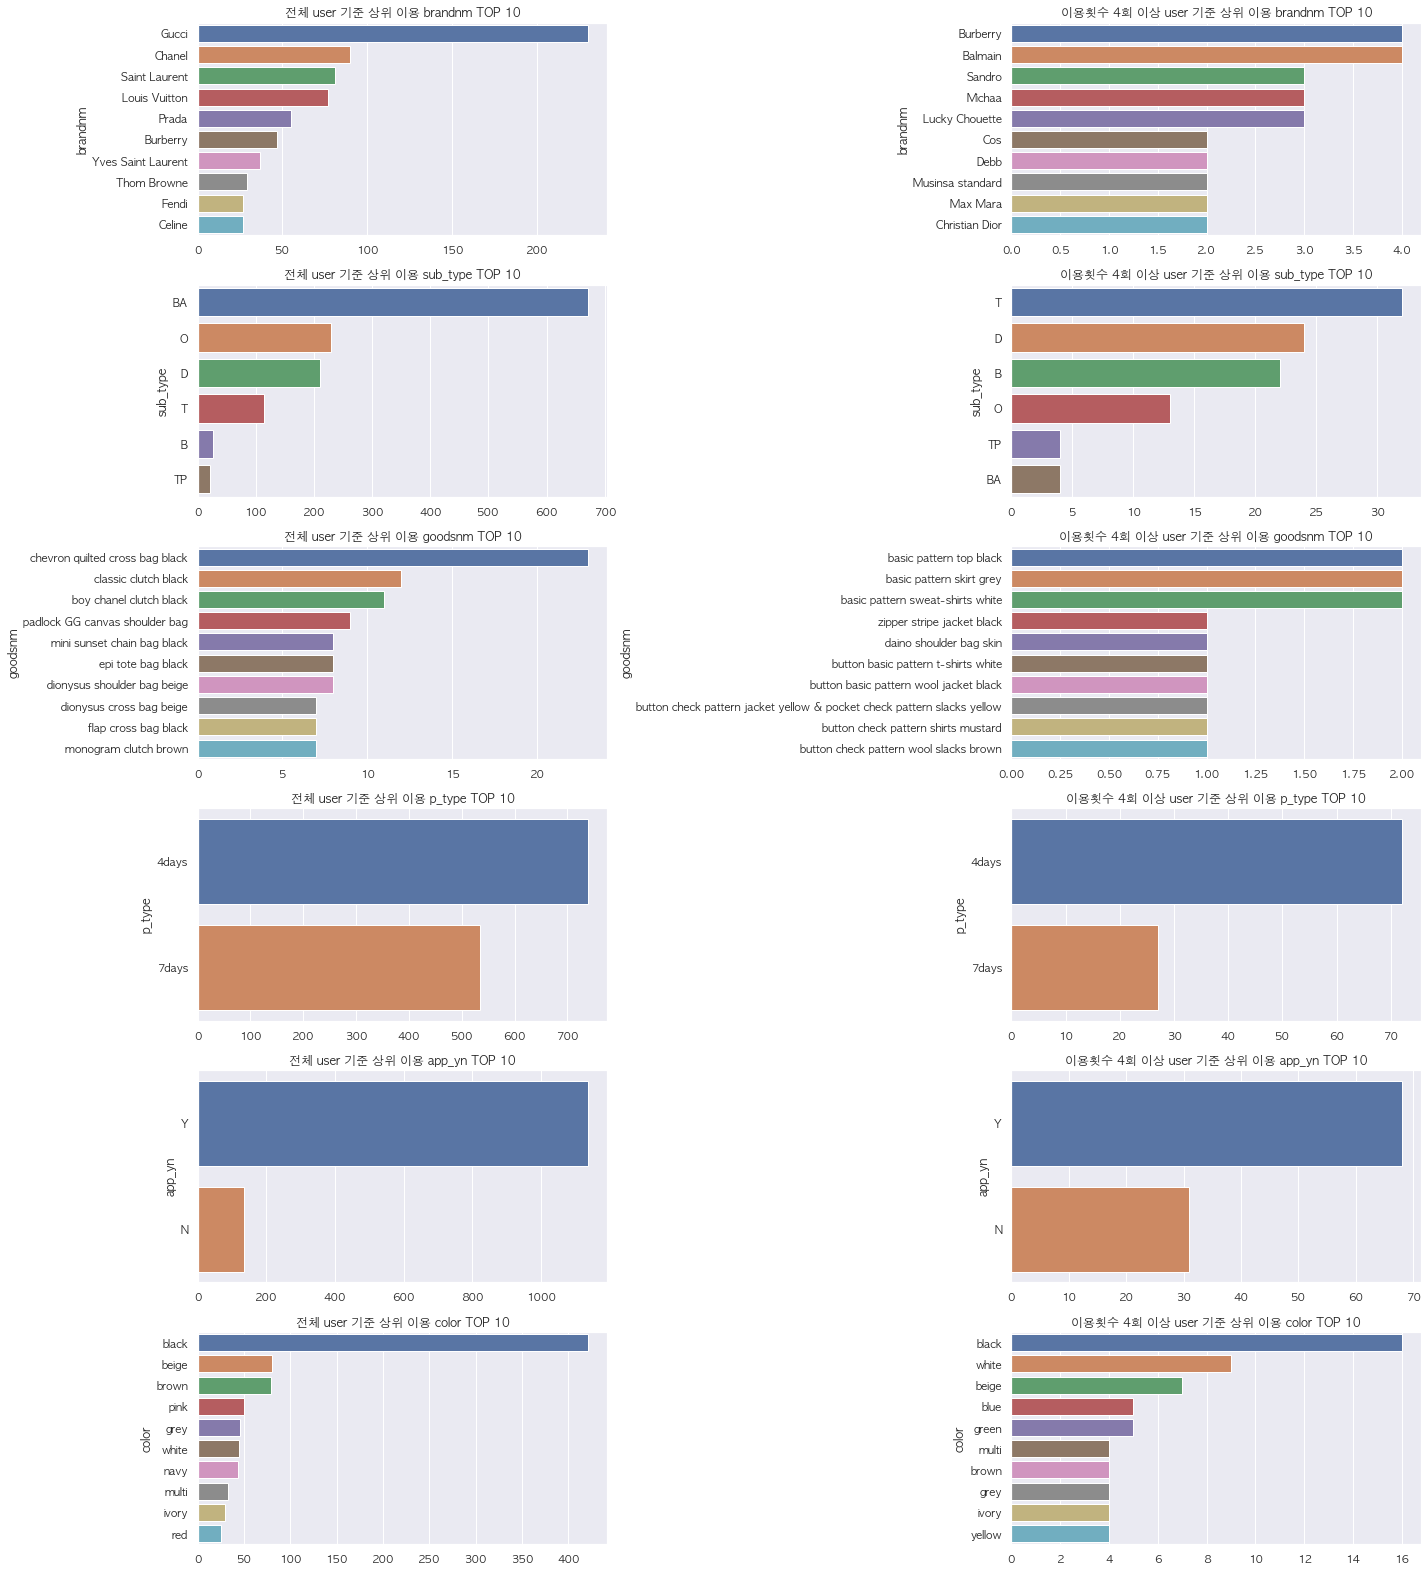

In [31]:
figure, ax_list_list = plt.subplots(nrows=6, ncols=2);
figure.set_size_inches(20,22)
ax_list = ax_list_list.reshape(6, 2)

column_list = ['brandnm', 'sub_type', 'goodsnm', 'p_type', 'app_yn', 'color']

for i in np.arange(0,len(column_list)):
    
        sns.barplot(closet_df.query('total_count <= 2').groupby(column_list[i])['user'].count().sort_values(ascending=False).head(10).values,
            closet_df.query('total_count <= 2').groupby(column_list[i])['user'].count().sort_values(ascending=False).head(10).index, ax=ax_list[i, 0])
        ax_list[i, 0].set_title(f"전체 user 기준 상위 이용 {column_list[i]} TOP 10")

        sns.barplot(closet_df.query('total_count >= 4').groupby(column_list[i])['user'].count().sort_values(ascending=False).head(10).values,
            closet_df.query('total_count >= 4').groupby(column_list[i])['user'].count().sort_values(ascending=False).head(10).index, ax=ax_list[i, 1])
        ax_list[i, 1].set_title(f"이용횟수 4회 이상 user 기준 상위 이용 {column_list[i]} TOP 10")

plt.tight_layout()

In [32]:
top_brandnm_list = list(closet_df.query('total_count <= 2').groupby('brandnm')['user'].count().sort_values(ascending=False).head(10).index)
closet_df.query(f"brandnm == {top_brandnm_list}")

,brandnm,goodsnm,user,reg_date,order_date_x,p_type,sub_type,app_yn,order_date_y,total_count,color
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,2021-01-15,1,beige
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,2021-01-15,1,NaN
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,2021-01-15,1,NaN
10,Louis Vuitton,twist monogram patent shoulder bag black,a1140216,2020-12-28,2021-01-15,7days,BA,Y,2021-01-15,1,black
12,Prada,color fur detail coat black,a1137815,2020-12-18,2021-01-15,7days,O,Y,2021-01-15,1,black
...,...,...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,2021-03-01,1,pink
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,2021-03-01,1,gray
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,2021-03-01,1,beige
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,2021-03-01,1,white


- 주문이 많은 상위 10위 브랜드의 카테고리별 주문 내역을 보면, 전체적으로 가방 카테고리의 주문이 많은 것을 확인할 수 있다.
- 그 중에서 구찌의 주문량이 가장 많음을 알 수 있다.

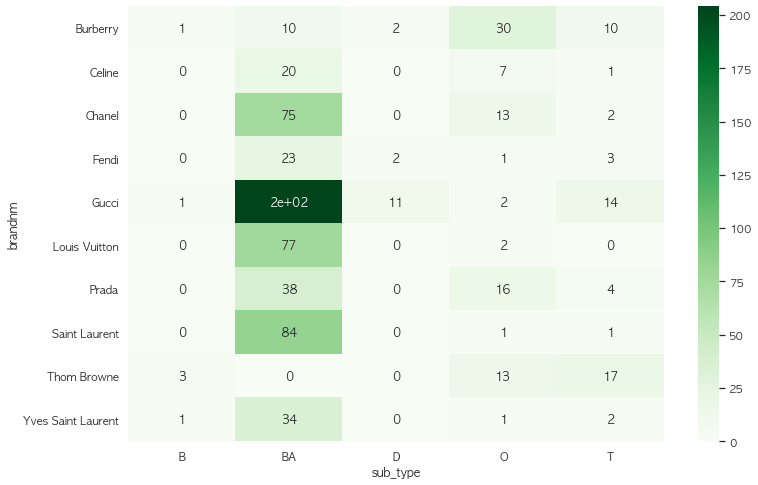

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(
pd.crosstab(index = closet_df.query(f"brandnm == {top_brandnm_list}")['brandnm'], columns = closet_df.query(f"brandnm == {top_brandnm_list}")['sub_type']),
cmap = 'Greens', annot=True)

- 4days 이용권 사용이 가장 많으며, 전체적으로는 앱 이용자가 압도적이다.
- 4회 이상 주문 user의 경우 4days 이용권 사용이 가장 많으나, 앱을 사용하지 않은 고객들의 4days 이용권이 두 번째로 많다.<br>주문을 많이 하는 고객의 경우 앱 이용이 적을 수도 있음을 확인.

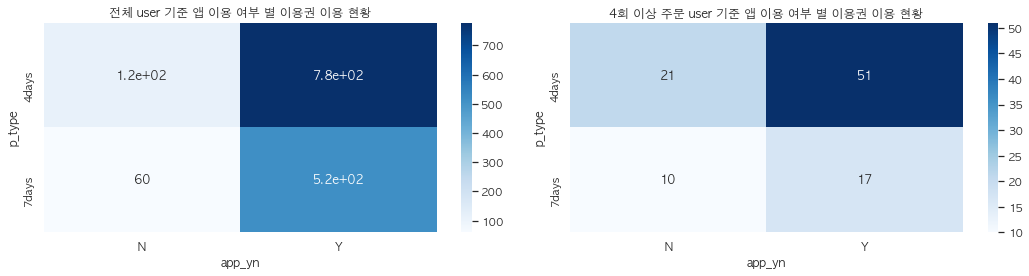

In [34]:
figure, ax_list_list = plt.subplots(nrows=1, ncols=2);
figure.set_size_inches(15,4)
ax_list = ax_list_list.reshape(2)

sns.heatmap(
pd.crosstab(index = closet_df['p_type'], columns = closet_df['app_yn']),
cmap = 'Blues', annot=True, ax=ax_list[0])
ax_list[0].set_title(f"전체 user 기준 앱 이용 여부 별 이용권 이용 현황")

sns.heatmap(
pd.crosstab(index = closet_df.query('total_count >= 4')['p_type'], columns = closet_df.query('total_count >= 4')['app_yn']),
cmap = 'Blues', annot=True, ax=ax_list[1])
ax_list[1].set_title(f"4회 이상 주문 user 기준 앱 이용 여부 별 이용권 이용 현황")

plt.tight_layout()

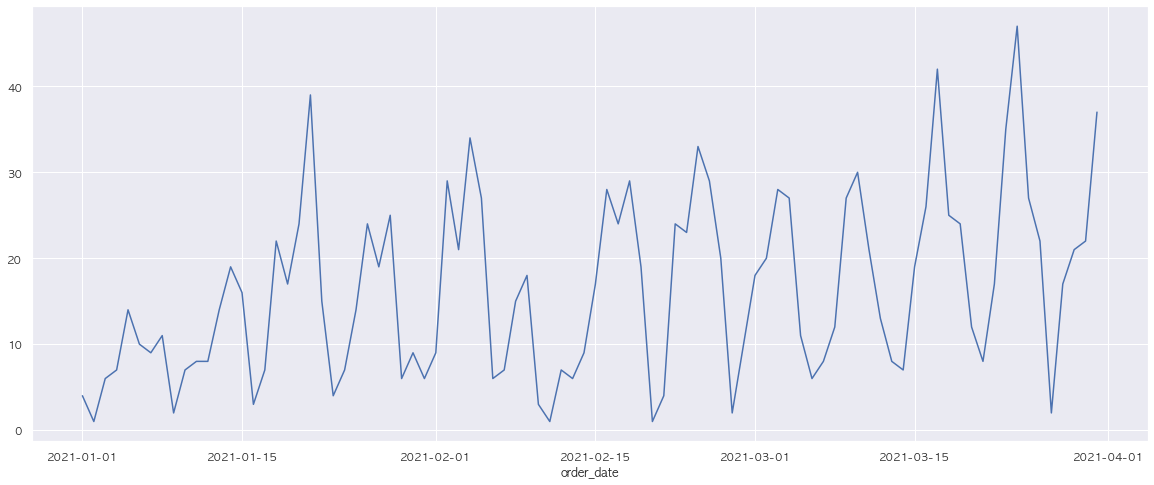

In [41]:
user_date_count = pd.concat([closet_df.groupby('user')['order_date'].min(), closet_df.groupby('user')['total_count'].mean()], axis=1)

plt.figure(figsize=(20,8))
sns.lineplot(x=user_date_count.groupby('order_date')['total_count'].sum().index,
             y=user_date_count.groupby('order_date')['total_count'].sum().values)

In [43]:
user_date_count['month'] = user_date_count.order_date.dt.month
user_date_count['week'] = user_date_count.order_date.dt.week
user_date_count['weekday'] = user_date_count.order_date.dt.weekday
user_date_count['day'] = user_date_count.order_date.dt.day
user_date_count['week_num']=""

min_week = pd.DataFrame(user_date_count.groupby('month')['week'].min()).reset_index('month')
user_date_count = pd.merge(user_date_count, min_week, on='month', how='left')
user_date_count.rename(columns={'week_x':'week', 'week_y':'min_week'}, inplace=True)

,order_date,total_count,month,week_x,weekday,day,week_num,week_y
0,2021-03-31,2,3,13,2,31,,9
1,2021-03-29,1,3,13,0,29,,9
2,2021-02-05,1,2,5,4,5,,5
3,2021-02-23,1,2,8,1,23,,5
4,2021-03-04,1,3,9,3,4,,9
...,...,...,...,...,...,...,...,...
1229,2021-01-21,1,1,3,3,21,,1
1230,2021-02-16,1,2,7,1,16,,5
1231,2021-01-06,1,1,1,2,6,,1
1232,2021-02-22,1,2,8,0,22,,5


In [48]:
# 월별 주차 정보 생성
for i in np.arange(0,len(user_date_count['order_date'])):
    if user_date_count['week'][i] == user_date_count['min_week'][i]:
        user_date_count['week_num'][i] = 1
    elif user_date_count['week'][i] == user_date_count['min_week'][i]+1:
        user_date_count['week_num'][i] = 2
    elif user_date_count['week'][i] == user_date_count['min_week'][i]+2:
        user_date_count['week_num'][i] = 3
    elif user_date_count['week'][i] == user_date_count['min_week'][i]+3:
        user_date_count['week_num'][i] = 4
    elif user_date_count['week'][i] == user_date_count['min_week'][i]+4:
        user_date_count['week_num'][i] = 5
        
user_date_count

<ipython-input-48-3beaf062f36c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_date_count['week_num'][i] = 5
<ipython-input-48-3beaf062f36c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_date_count['week_num'][i] = 1
<ipython-input-48-3beaf062f36c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_date_count['week_num'][i] = 4
<ipython-input-48-3beaf062f36c>:6: SettingWithCopyWarning: 
A value is trying to be set o

,order_date,total_count,month,week,weekday,day,week_num,min_week
0,2021-03-31,2,3,13,2,31,5,9
1,2021-03-29,1,3,13,0,29,5,9
2,2021-02-05,1,2,5,4,5,1,5
3,2021-02-23,1,2,8,1,23,4,5
4,2021-03-04,1,3,9,3,4,1,9
...,...,...,...,...,...,...,...,...
1229,2021-01-21,1,1,3,3,21,3,1
1230,2021-02-16,1,2,7,1,16,3,5
1231,2021-01-06,1,1,1,2,6,1,1
1232,2021-02-22,1,2,8,0,22,4,5


In [62]:
user_date_count.groupby('order_date').sum()

,total_count,month,week,weekday,day,min_week
order_date,,,,,,
2021-01-01,4,2,106,8,2,2
2021-01-02,1,1,53,5,2,1
2021-01-03,6,6,318,36,18,6
2021-01-04,7,5,5,0,20,5
2021-01-05,14,10,10,10,50,10
...,...,...,...,...,...,...
2021-03-27,2,6,24,10,54,18
2021-03-28,17,48,192,96,448,144
2021-03-29,21,54,234,0,522,162


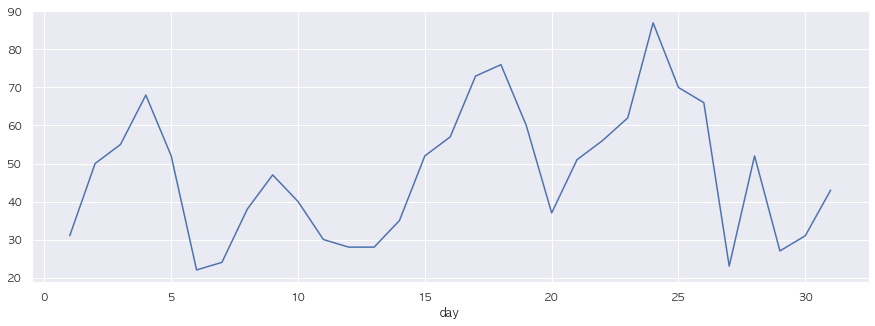

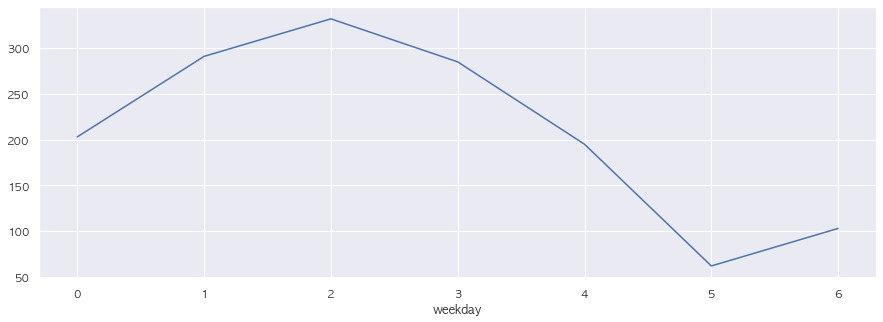

In [59]:
plt.figure(figsize=(15,5))
sns.lineplot(x=user_date_count.groupby('day')['total_count'].sum().index,
             y=user_date_count.groupby('day')['total_count'].sum().values)

plt.figure(figsize=(15,5))
sns.lineplot(x=user_date_count.groupby('weekday')['total_count'].sum().index,
             y=user_date_count.groupby('weekday')['total_count'].sum().values)